<a href="https://colab.research.google.com/github/moysis01/Alpaca-Trading/blob/main/Moysis_HDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the MNIST Dataset - Visualizing train and test images

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#The MNIST dataset is split into two parts
#Train data consists of 60,000 images and their corresponding labels.
#Test data consists of 10,000 images and their corresponding labels.

Reshaping and Normalizing the images

In [ ]:

#Reshaping
train_images = train_images.reshape((60000, 28, 28, 1)) #reshaping the training images from (60000, 28, 28) to (60000, 28, 28, 1) making it 4-dimensional
test_images = test_images.reshape((10000, 28, 28, 1))   #similarly as above, the reseason is 4-dimensions are necessary when working with CNN and tensorflow
                                                        #number 1 indicates that the images are grayscale (only one color channel)
#Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0
##The pixel values in the MNIST dataset range from 0 to 255.
#Normalizing these pixel values to the range [0, 1] makes the neural network's training process more stable and faster.
#Dividing each pixel value by 255.0 scales it down to a floating-point value between 0 and 1
#applied to both training and test datasets

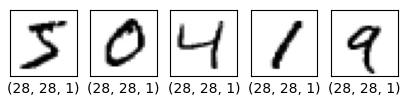

In [ ]:
plt.figure(figsize=(5, 5))     # visualizing the labelled MNIST training dataset
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(train_images[i].shape)# exploring the size of the train images
plt.show()



Size of the  1 image (28, 3)
Size of the  2 image (28, 3)
Size of the  3 image (28, 3)
Size of the  4 image (28, 3)
Size of the  5 image (28, 3)
Size of the  6 image (28, 3)
Size of the  7 image (28, 3)
Size of the  8 image (28, 3)
Size of the  9 image (28, 3)
Size of the  10 image (28, 3)


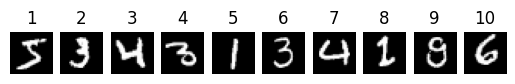

In [ ]:
# dataset path
folder_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset'

images = [] #empty list to store images

#Checking and reading if the image is a png format using opencv
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)


# Printing the 10 simple images from the test dataset for visualization
for i, img in enumerate(images[:10]):
    plt.subplot(1, 10, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # converting BGR to RGB
    plt.title(i+1)
    print("Size of the ",i+1,"image",img[i].shape)
    plt.axis('off')
plt.show()

# Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),                                 # explained in report
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#compared to the next model,  this model has higher values of loss and val_loss

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1397 - accuracy: 0.9575 - val_loss: 0.0442 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0372 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0256 - val_accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0251 -

# Refined Convolutional Neural Network (CNN)  and Plotting

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),                               # explained in report
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5', save_best_only=True)

history = model.fit(train_images, train_labels, epochs=30, batch_size=32,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
1875/1875 [==============================] - 111s 58ms/step - loss: 0.1478 - accuracy: 0.9553 - val_loss: 0.0481 - val_accuracy: 0.9849
Epoch 2/30
   1/1875 [..............................] - ETA: 1:50 - loss: 0.0626 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 113s 60ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.0454 - val_accuracy: 0.9867
Epoch 3/30
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 4/30
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0495 - accuracy: 0.9855 - val_loss: 0.0383 - val_accuracy: 0.9883
Epoch 5/30
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0396 - accuracy: 0.9882 - val_loss: 0.0439 - val_accuracy: 0.9876
Epoch 6/30
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0393 - accuracy: 0.9886 - val_loss: 0.0268 - val_accuracy: 0.9914
Epoch 7/30
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 0.0317 - val_accuracy: 0.9918
Epoch 8/30
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0468 - val_accur

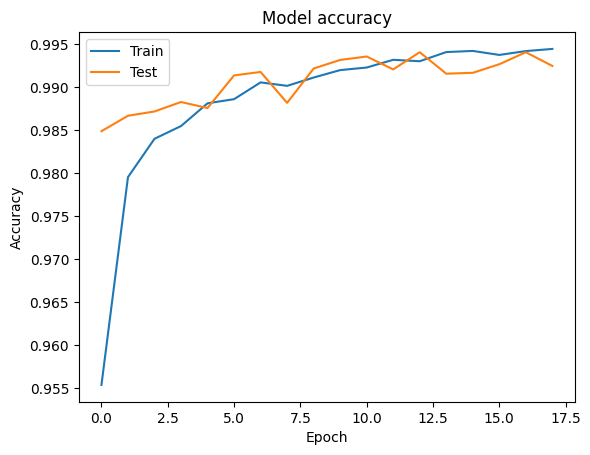

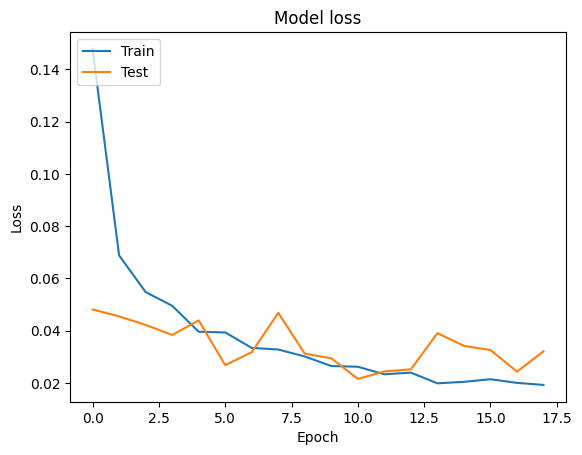

In [ ]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#def preprocess_images(real_images, size=(28, 28), normalize=True):
#    processed_images = []
#    for img in real_images:
#        img_resized = cv2.resize(img, size)
#        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
#        if normalize:
#            img_gray = img_gray / 255.0
#        processed_images.append(img_gray)
#    return np.array(processed_images)


# 000-009.png Images Analysis

In [ ]:
from PIL import Image


#Checking and reading if the image is a png format
#If yes the its populating the folder_path with the images
def load_png(folder_path):
    images = []                                 #empty list to store images
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                images.append(img.copy())
    return images

png_images = load_png(folder_path)

In [ ]:
def preprocess_images(images):
    processed_images = []
    for img in images:
        img = img.resize((28, 28)).convert('L')#resize + grayscale
        img_array = np.array(img) / 255.0
        processed_images.append(img_array)
    return np.array(processed_images)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

real_images = load_png(folder_path)
real_images_processed = preprocess_images(real_images)

model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5')

predicted_labels = model.predict(real_images_processed)
predicted_labels = np.argmax(predicted_labels, axis=1)

1/1 [==============================] - 0s 138ms/step


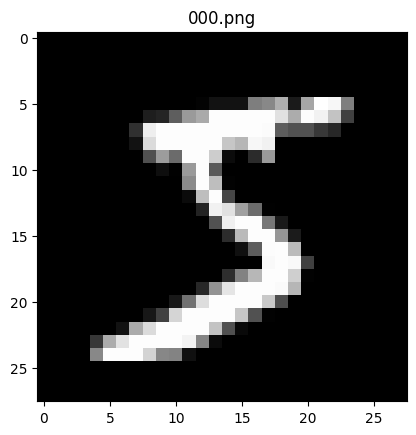

Enter the label for this image: 5


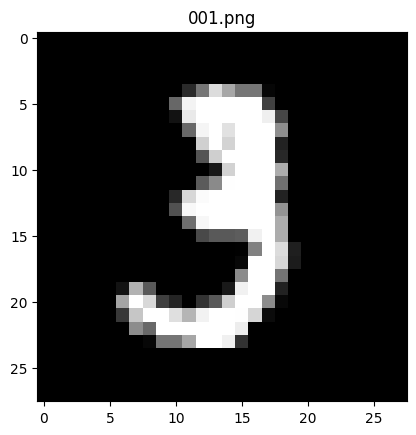

Enter the label for this image: 3


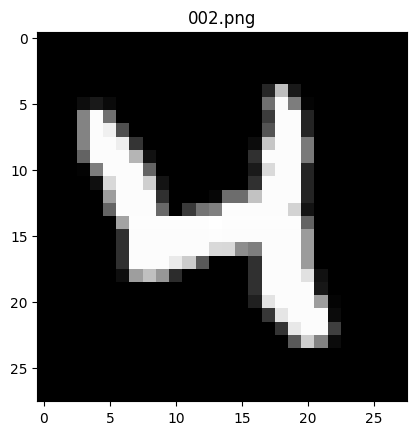

Enter the label for this image: 4


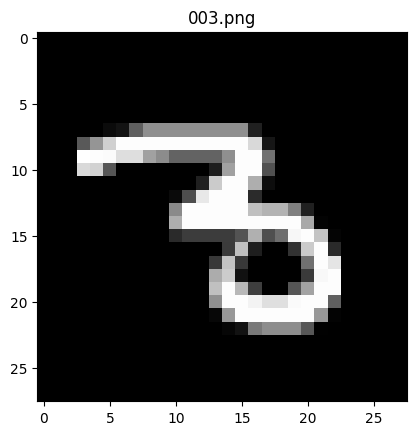

Enter the label for this image: 3


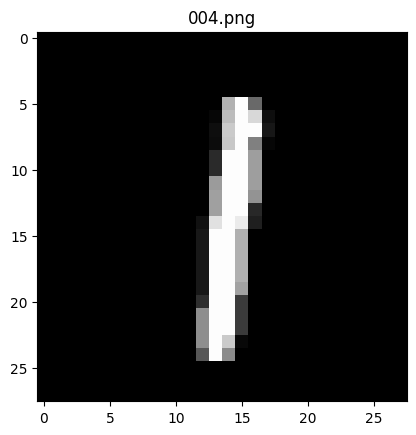

Enter the label for this image: 1


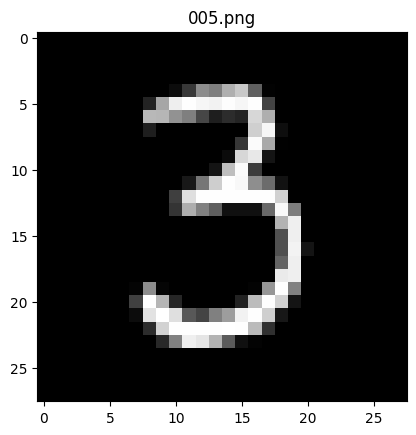

Enter the label for this image: 3


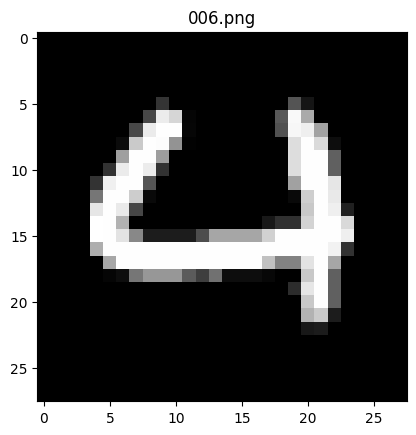

Enter the label for this image: 4


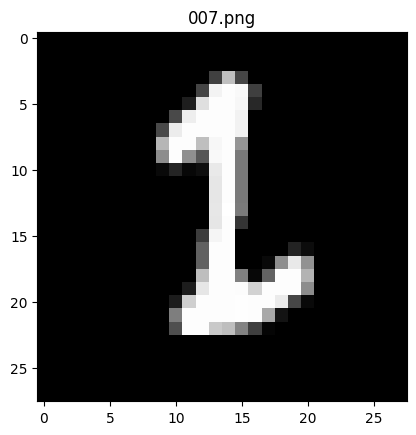

Enter the label for this image: 1


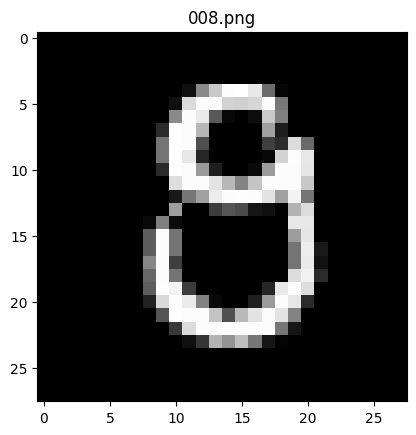

Enter the label for this image: 9


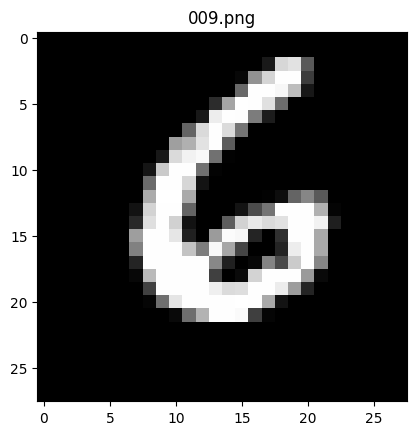

Enter the label for this image: 6


In [ ]:
def label_images(folder_path):
    labels = []
    filenames = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".png"):

            img_path = os.path.join(folder_path, filename)
            img = plt.imread(img_path)
            plt.imshow(img, cmap='gray')
            plt.title(filename)
            plt.show()                                                              # this function was optional, implemented in order to label the first simple images and then validate models predictions

            label = input("Enter the label for this image: ")
            labels.append(int(label))
            filenames.append(filename)
            plt.close()

    return filenames, np.array(labels)


filenames, real_labels = label_images(folder_path)


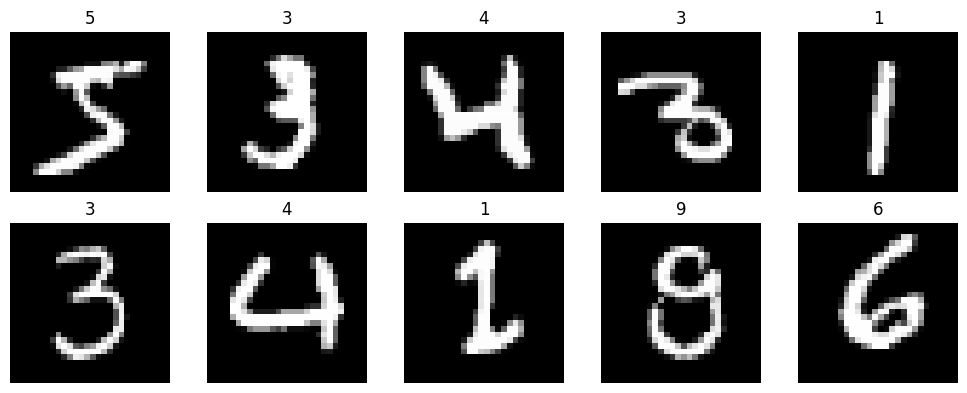

Accuracy on real handwriting samples: 1.0


In [ ]:
def display_images_with_predictions(images, predictions):
    if len(images) != len(predictions):
        print("Error: The number of images and predictions do not match.")
        return


    num_images = len(images)
    num_cols = 5
    num_rows = num_images // num_cols + (1 if num_images % num_cols else 0)

    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(predictions[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


display_images_with_predictions(png_images, predicted_labels)

# Evaluation
accuracy = np.mean(predicted_labels == real_labels)
print(f"Accuracy on real handwriting samples: {accuracy}")


# 010.png Image Analysis


In [ ]:
def resize_image(image, max_size=800):
    height, width = image.shape[:2]
    scaling_factor = max_size / float(height)
    if width > height:
        scaling_factor = max_size / float(width)
    new_size = (int(width * scaling_factor), int(height * scaling_factor))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    return resized_image
# parameters image and max_size (default value 800)
# Extracts the height and width from the image dimensions
# Calculates the scaling factor based on the height
# If the width is greater than the height, recalculates the scaling factor based on the width
# Calculates the new dimensions of the image after scaling
# Resizes the image to the new dimensions using INTER_AREA preventing it from shrinking

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img10 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/010.png')
img10_resized=resize_image(img10)

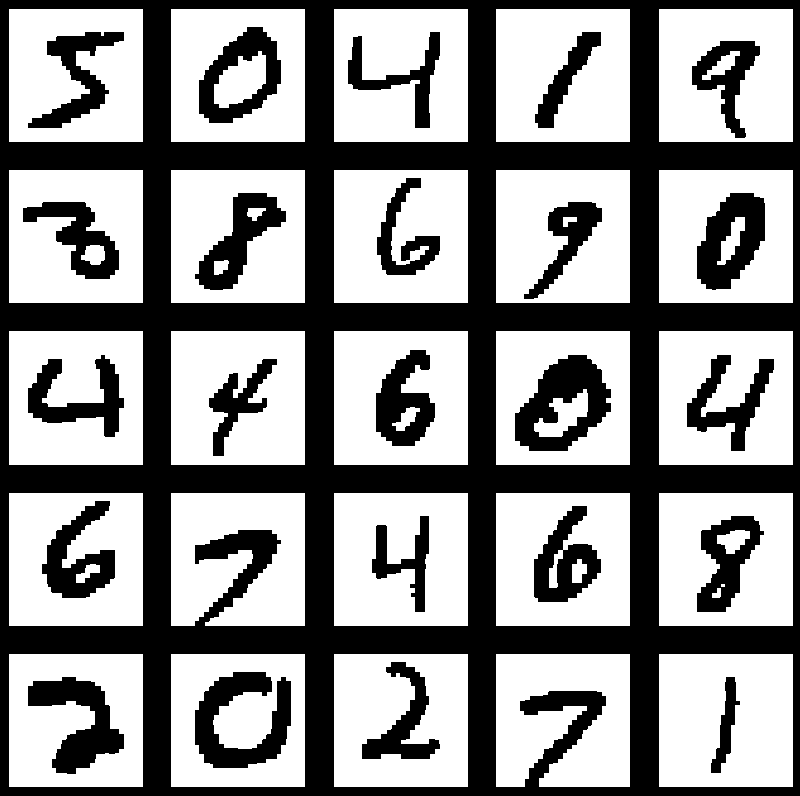

In [ ]:
from google.colab.patches import cv2_imshow
im10_gray = cv2.cvtColor(img10_resized, cv2.COLOR_RGB2GRAY)
_, thresh10 = cv2.threshold(im10_gray, 55, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(thresh10)

In [ ]:
#from google.colab.patches import cv2_imshow
#cv2_imshow(cv2.drawContours(dst10,  contours, -1, (0, 0, 255), 2, 2)) # drawing the contours on the denoised image


In [ ]:
img10_resized.shape

(796, 800, 3)

In [ ]:
thresh10.shape

(796, 800)

In [ ]:
target_size = (28, 28)  # Width and height in a tuple
def preprocess_digit(roi):

    roi_resized = cv2.resize(roi, target_size, interpolation=cv2.INTER_AREA)
    roi_normalized = roi_resized / 255.0
    roi_reshaped = roi_normalized.reshape((*target_size, 1))
    return roi_reshaped

Segmented Digit 1: Predicted as 2
Segmented Digit 2: Predicted as 0
Segmented Digit 3: Predicted as 3
Segmented Digit 4: Predicted as 8
Segmented Digit 5: Predicted as 8
Segmented Digit 6: Predicted as 3
Segmented Digit 7: Predicted as 2
Segmented Digit 8: Predicted as 8
Segmented Digit 9: Predicted as 0
Segmented Digit 10: Predicted as 3
Segmented Digit 11: Predicted as 0
Segmented Digit 12: Predicted as 0
Segmented Digit 13: Predicted as 3
Segmented Digit 14: Predicted as 0
Segmented Digit 15: Predicted as 2
Segmented Digit 16: Predicted as 7
Segmented Digit 17: Predicted as 0
Segmented Digit 18: Predicted as 0
Segmented Digit 19: Predicted as 9
Segmented Digit 20: Predicted as 1
Segmented Digit 21: Predicted as 0
Segmented Digit 22: Predicted as 8
Segmented Digit 23: Predicted as 0
Segmented Digit 24: Predicted as 0
Segmented Digit 25: Predicted as 2


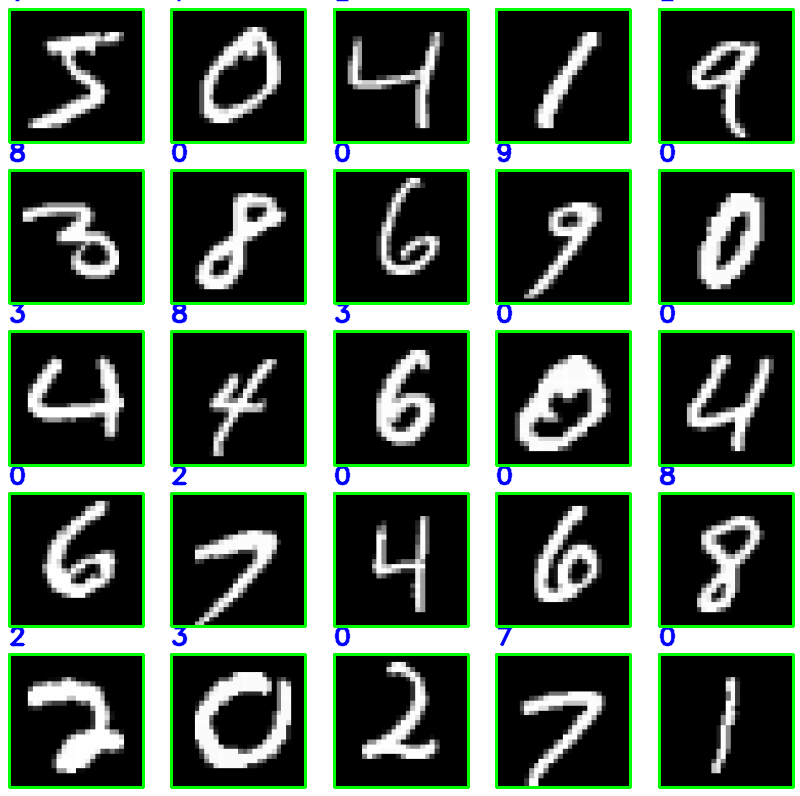

In [ ]:
# Find contours in thresh10 using external retrieval mode and simple approximation
contours, _ = cv2.findContours(thresh10, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on the x-coordinate of their bounding rectangle
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Initialize an empty list to store predicted digits
digit_predictions = []

for i, contour in enumerate(contours):  # Iterate over each contour
    area = cv2.contourArea(contour)  # Calculate the area of the contour
    if area > 20:  # Proceed only if the area is greater than the threshold
        x, y, w, h = cv2.boundingRect(contour)  # Compute the bounding rectangle for the contour
        roi = thresh10[y:y+h, x:x+w]  # Extract the region of interest (ROI) from thresh10

        # Pad the ROI with a width of 15, filling with 0s, to prepare for digit recognition
        roi_padded = np.pad(roi, pad_width=15, constant_values=0)

        # Preprocess the padded ROI for digit prediction
        roi_prepared = preprocess_digit(roi_padded)

        # Pass the preprocessed ROI through the model to predict the digit
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]  # Predict the digit
        digit_predictions.append(predicted_digit)  # Store the result in digit_predictions

        # Draw a green rectangle around the detected digit
        cv2.rectangle(img10_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Write the predicted digit in blue above the rectangle
        cv2.putText(img10_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

        # Print the index and the predicted digit to the console
        print(f"Segmented Digit {i+1}: Predicted as {predicted_digit}")

# Display the img10_resized image with drawn rectangles and predicted digits
cv2_imshow(img10_resized)


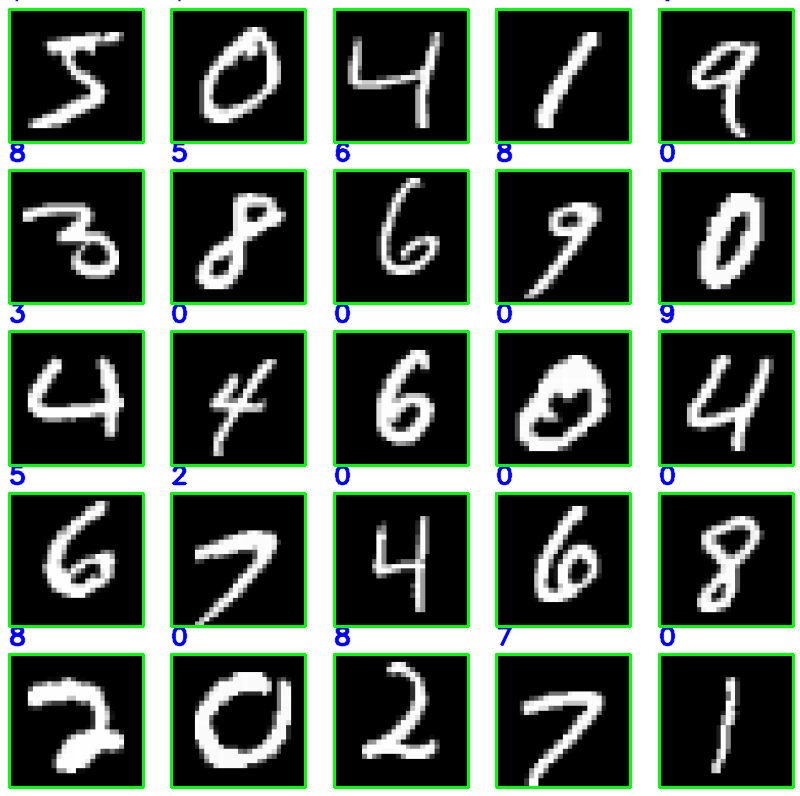

In [ ]:
def print_ctr_original10(image_path, model):
    original_image = cv2.imread(image_path)  # Load the original image
    original_image_resized12 = resize_image(original_image)

    #  contours available from previous segmentation
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = thresh10[y:y+h, x:x+w]  # Using the already processed image for ROI
        roi_padded = np.pad(roi, pad_width=5, constant_values=0)

        roi_prepared = preprocess_digit(roi_padded)
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]

        # Draw rectangles and text on the resized original image
        cv2.rectangle(original_image_resized12, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(original_image_resized12, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return original_image_resized12

model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5') # at this case refined_best_model is recognising the second 2 as 7 => best_model.h5
img_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/010.png'
annotated_image = print_ctr_original10(img_path, model)

cv2_imshow(annotated_image)


# 011.png Image Analysis

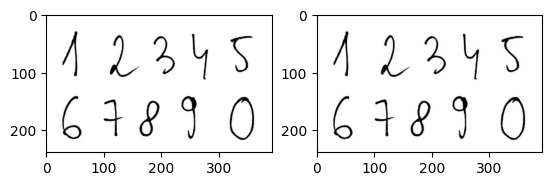

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img11 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/011.png')
dst11 = cv.fastNlMeansDenoisingColored(img11,None,10,10,7,21) # denoising
plt.subplot(121),plt.imshow(img11)
plt.subplot(122),plt.imshow(dst11)
plt.show()

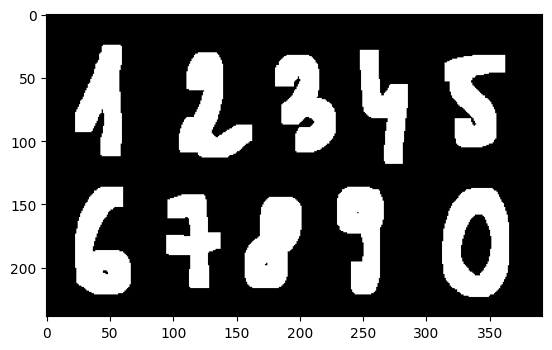

In [ ]:
im11_gray = cv2.cvtColor(dst11, cv2.COLOR_RGB2GRAY)
_, thresh11 = cv2.threshold(im11_gray, 10, 220, cv2.THRESH_BINARY_INV)#adjusting the parameters
kernel = np.ones((5,5),np.uint8)
dilation11 = cv2.dilate(thresh11,kernel,iterations =3)
plt.imshow(dilation11, cmap = 'gray')

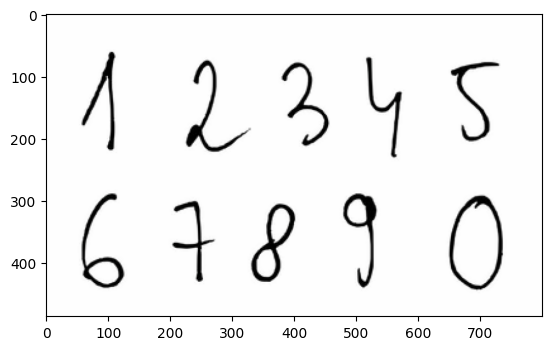

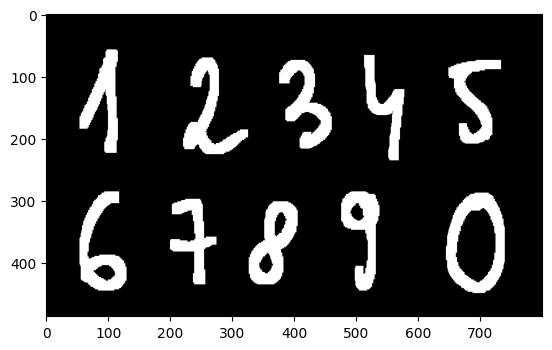

(487, 800, 3)


In [ ]:
import cv2

# Resize the image
def resize_image(image, max_size=800):  #  parameters image and max_size (default value 800)
    height, width = image.shape[:2]     # Extracts the height and width from the image dimensions
    scaling_factor = max_size / float(height)# Calculates the scaling factor based on the height
    if width > height:
        scaling_factor = max_size / float(width) # If the width is greater than the height, recalculates the scaling factor based on the width
    new_size = (int(width * scaling_factor), int(height * scaling_factor))  # Calculates the new dimensions of the image after scaling
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)# Resizes the image to the new dimensions using INTER_AREA preventing it from shrinking
    return resized_image

# Apply resizing
resized_img11 = resize_image(dst11)
plt.imshow(cv2.cvtColor(resized_img11, cv2.COLOR_BGR2RGB))
plt.show()

# Convert to grayscale and apply threshold

im11_gray_resized11 = cv2.cvtColor(resized_img11, cv2.COLOR_BGR2GRAY)
_, thresh_resized11 = cv2.threshold(im11_gray_resized11, 10, 220, cv2.THRESH_BINARY_INV)
dilation_resized11 = cv2.dilate(thresh_resized11,kernel,iterations =3)
plt.imshow(dilation_resized11, cmap = 'gray')
plt.show()



print(resized_img11.shape)


Segmented Digit 1:Predicted as 6


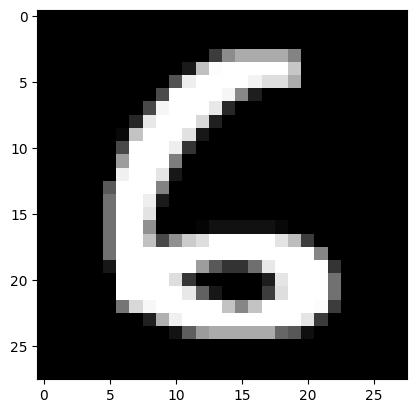

Segmented Digit 2:Predicted as 1


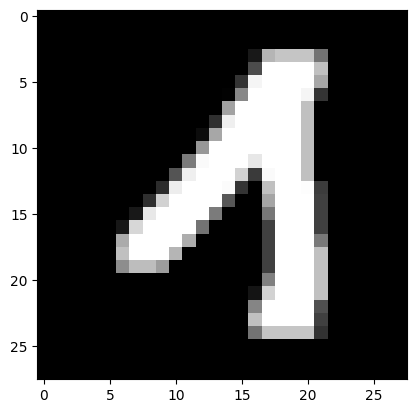

Segmented Digit 3:Predicted as 7


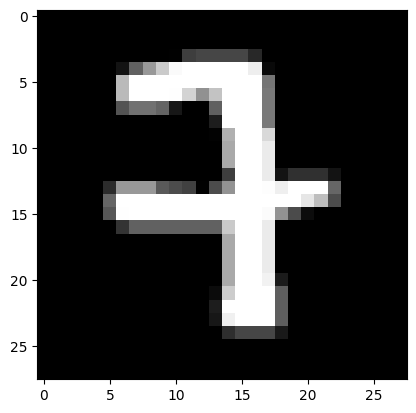

Segmented Digit 4:Predicted as 2


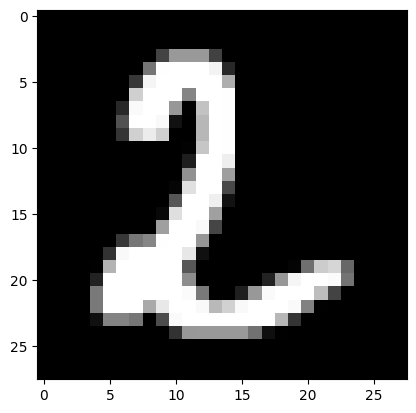

Segmented Digit 5:Predicted as 8


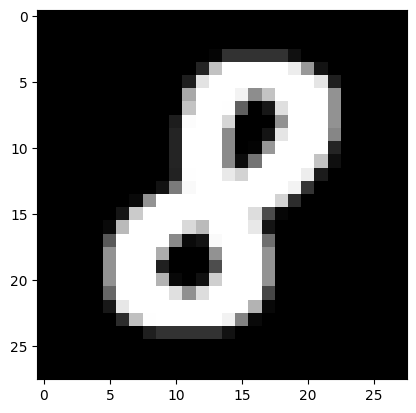

Segmented Digit 6:Predicted as 3


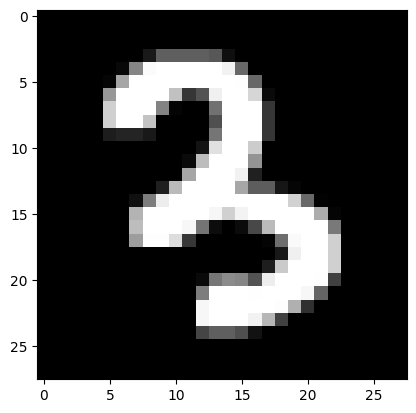

Segmented Digit 7:Predicted as 9


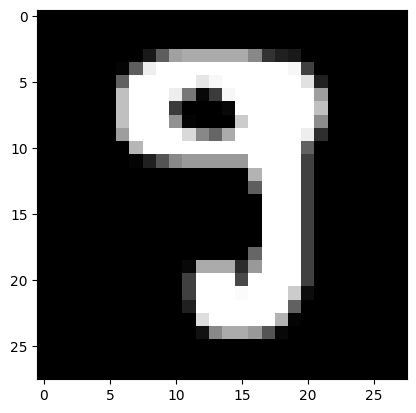

Segmented Digit 8:Predicted as 4


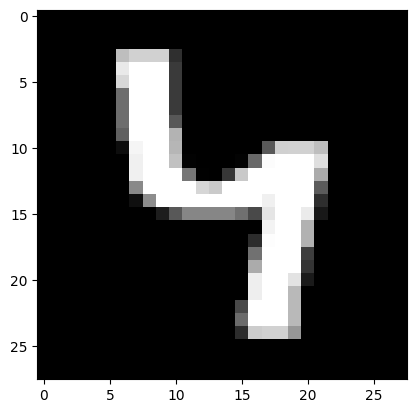

Segmented Digit 9:Predicted as 0


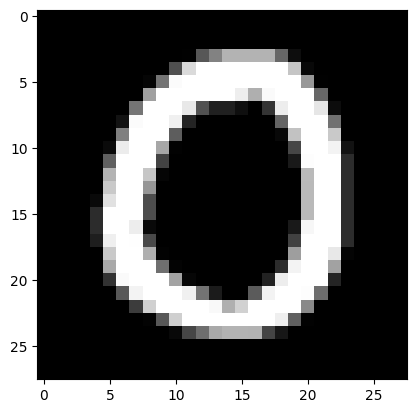

Segmented Digit 10:Predicted as 5


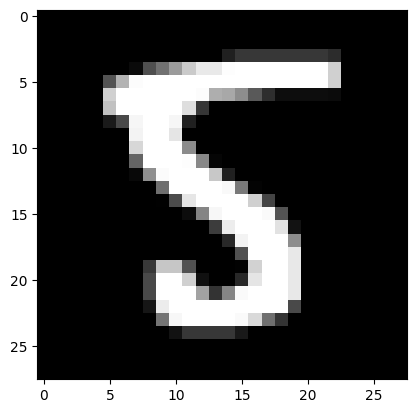

In [ ]:
contours, _ = cv2.findContours(dilation_resized11, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

digit_predictions = []
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = dilation_resized11[y:y+h, x:x+w]
    roi_padded  = np.pad(roi, pad_width=25, constant_values=0)  # Padding

    # Preprocess the ROI for the model
    roi_prepared = preprocess_digit(roi_padded)


    # Predict the digit
    prediction = model(np.array([roi_prepared]), training=False)
    predicted_digit = np.argmax(prediction, axis=1)[0]
    digit_predictions.append(predicted_digit)

    print(f"Segmented Digit {i+1}:Predicted as {predicted_digit}")
    # Ensure roi_prepared is correctly reshaped for visualization
    plt.imshow(roi_prepared, cmap='gray')
    plt.show()


    # Draw rectangles and text on the image
    cv2.rectangle(dilation_resized11, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(dilation_resized11, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)





Contour 1 at (54, 286), Predicted as 6
Contour 2 at (54, 57), Predicted as 1
Contour 3 at (200, 298), Predicted as 7
Contour 4 at (221, 70), Predicted as 2
Contour 5 at (327, 302), Predicted as 8
Contour 6 at (376, 74), Predicted as 3
Contour 7 at (476, 286), Predicted as 9
Contour 8 at (513, 66), Predicted as 4
Contour 9 at (645, 288), Predicted as 0
Contour 10 at (649, 74), Predicted as 5


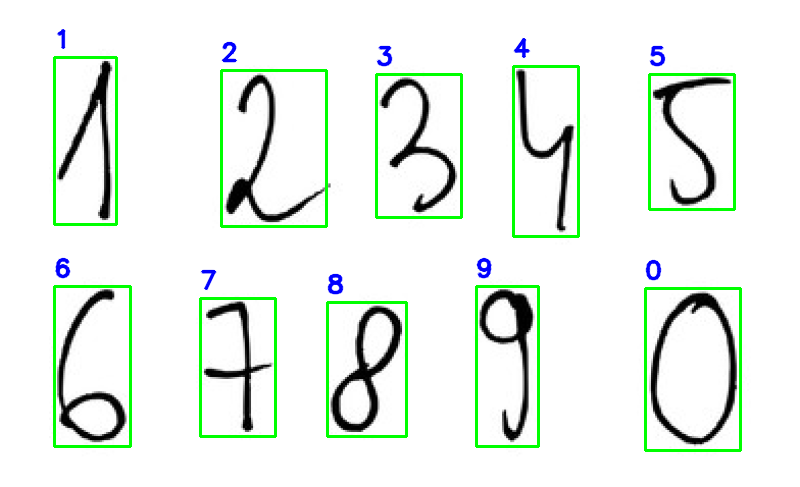

In [ ]:
def print_ctr_original11(image_path, model):
    original_image = cv2.imread(image_path)  # Load the original image
    original_image_resized11 = resize_image(original_image)  # Resize if necessary

    for i, cnt in enumerate(contours):
      x, y, w, h = cv2.boundingRect(cnt)
      roi = dilation_resized11[y:y+h, x:x+w]
      roi_padded = np.pad(roi, pad_width=25, constant_values=0)

      roi_prepared = preprocess_digit(roi_padded)
      prediction = model(np.array([roi_prepared]), training=False)
      predicted_digit = np.argmax(prediction, axis=1)[0]

      print(f"Contour {i+1} at ({x}, {y}), Predicted as {predicted_digit}")

      cv2.rectangle(original_image_resized11, (x, y), (x+w, y+h), (0, 255, 0), 2)
      cv2.putText(original_image_resized11, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return(original_image_resized11)


# Usage
model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5')
img_path11 = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/011.png'
annotated_image = print_ctr_original11(img_path11, model)

cv2_imshow(annotated_image)


Previous Approach

In [ ]:
target_size = (28, 28)

def preprocess_digit(roi):

    roi_resized = cv2.resize(roi, target_size, interpolation=cv2.INTER_AREA)
    roi_normalized = roi_resized / 255.0
    roi_reshaped = roi_normalized.reshape((*target_size, 1))
    return roi_reshaped

def segment_and_recognize(image_path, model):
    image_clr = cv2.imread(image_path)
    image = cv2.cvtColor(image_clr, cv2.COLOR_BGR2GRAY)
    if np.mean(image) > 127:
        image = cv2.bitwise_not(image)

    _, thresh = cv2.threshold(image, 40, 220, cv2.THRESH_BINARY)


    kernel_size = 5
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    iterations = 2
    dilated = cv2.dilate(thresh, kernel, iterations=iterations)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)


    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    digit_predictions = []
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = opening[y:y+h, x:x+w]
        roi = np.pad(roi, pad_width = 15, constant_values=0) # padding between digits
        roi_prepared = preprocess_digit(roi)


        print(f"Segmented Digit {i+1}:")
        plt.imshow(roi_prepared.reshape(target_size))

        prediction = model.predict(np.array([roi_prepared]))
        predicted_digit = np.argmax(prediction, axis=1)[0]
        digit_predictions.append(predicted_digit)


        cv2.rectangle(image_clr, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_clr, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)


    return image_clr, digit_predictions

Segmented Digit 1:
1/1 [==============================] - 0s 152ms/step
Segmented Digit 2:
1/1 [==============================] - 0s 39ms/step
Segmented Digit 3:
1/1 [==============================] - 0s 34ms/step
Segmented Digit 4:
1/1 [==============================] - 0s 30ms/step
Segmented Digit 5:
1/1 [==============================] - 0s 41ms/step
Segmented Digit 6:
1/1 [==============================] - 0s 34ms/step
Segmented Digit 7:
1/1 [==============================] - 0s 33ms/step
Segmented Digit 8:
1/1 [==============================] - 0s 31ms/step
Segmented Digit 9:
1/1 [==============================] - 0s 36ms/step
Segmented Digit 10:
1/1 [==============================] - 0s 31ms/step


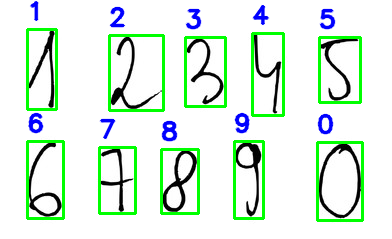

Predictions: [6, 1, 7, 2, 8, 3, 9, 4, 0, 5]


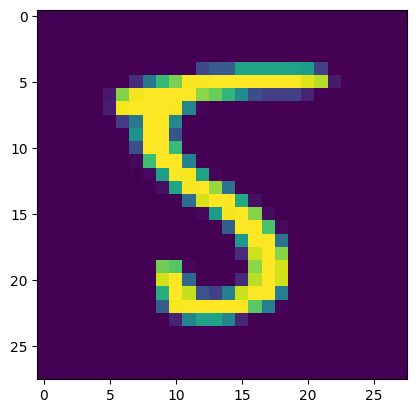

In [ ]:
import cv2
model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5')


img_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/011.png'
annotated_image, predictions = segment_and_recognize(img_path, model)


cv2_imshow(annotated_image)
print("Predictions:", predictions)


# 012.png Image Analysis

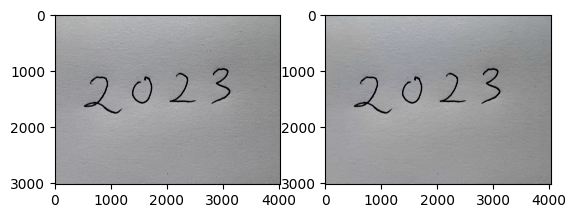

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img12 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/012.png')
dst = cv.fastNlMeansDenoisingColored(img12,None,10,10,7,21) # denoising
plt.subplot(121),plt.imshow(img12)
plt.subplot(122),plt.imshow(dst)
plt.show()

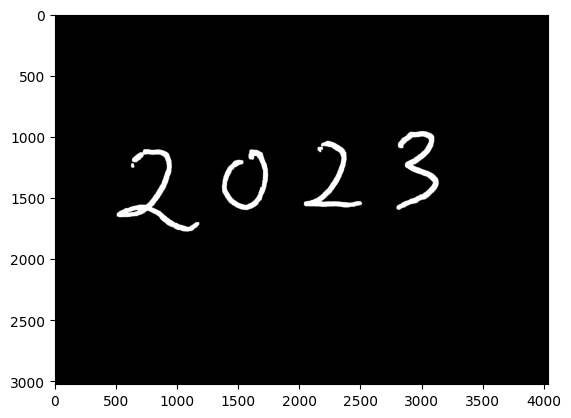

In [ ]:
im12_gray = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(im12_gray, 23, 220, cv2.THRESH_BINARY_INV)
dilation = cv2.dilate(thresh,kernel,iterations =4)
plt.imshow(dilation, cmap = 'gray')

In [ ]:
img12.shape

(3024, 4032, 3)

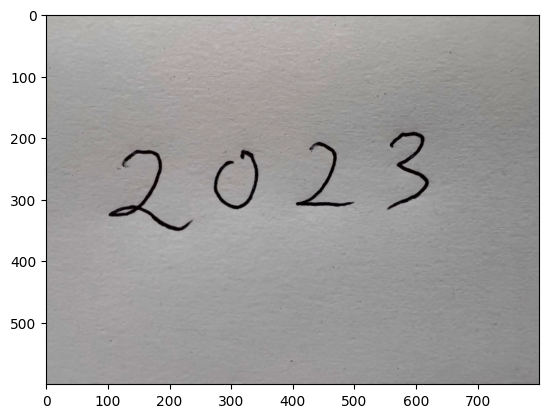

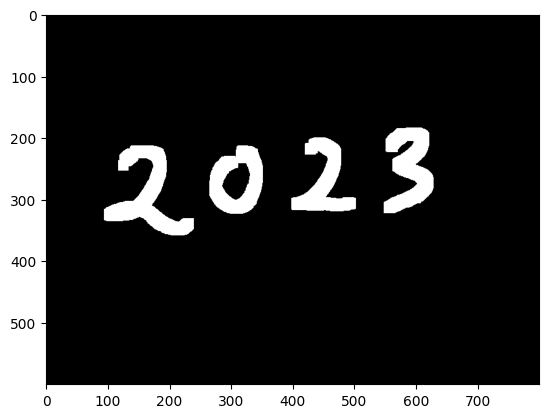

(600, 800, 3)


In [ ]:
import cv2

# Resize the image
def resize_image(image, max_size=800):
    height, width = image.shape[:2]
    scaling_factor = max_size / float(height)
    if width > height:
        scaling_factor = max_size / float(width)
    new_size = (int(width * scaling_factor), int(height * scaling_factor))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    return resized_image

# Apply resizing
resized_img12 = resize_image(dst)
plt.imshow(cv2.cvtColor(resized_img12, cv2.COLOR_BGR2RGB))
plt.show()

# Convert to grayscale and apply threshold
im12_gray_resized = cv2.cvtColor(resized_img12, cv2.COLOR_BGR2GRAY)
_, thresh_resized = cv2.threshold(im12_gray_resized, 23, 220, cv2.THRESH_BINARY_INV)
dilation_resized = cv2.dilate(thresh_resized,kernel,iterations =4)
plt.imshow(dilation_resized, cmap = 'gray')
plt.show()



print(resized_img12.shape)


Segmented Digit 1:Predicted as 2


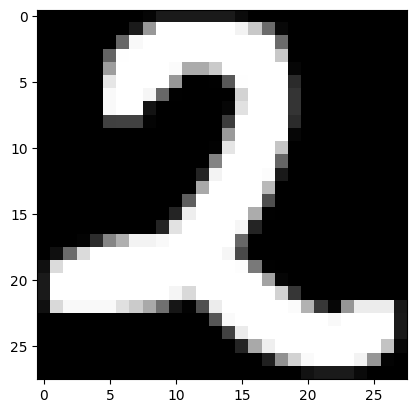

Segmented Digit 2:Predicted as 0


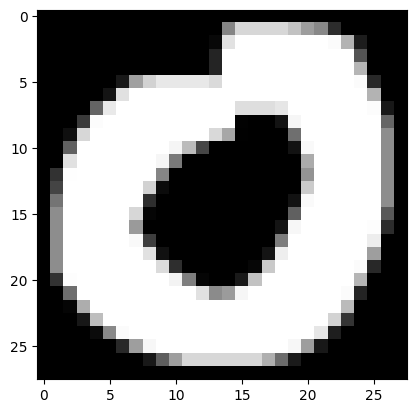

Segmented Digit 3:Predicted as 2


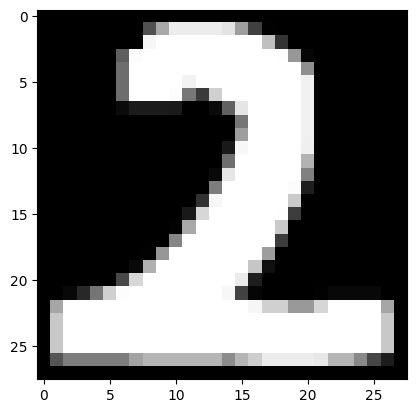

Segmented Digit 4:Predicted as 3


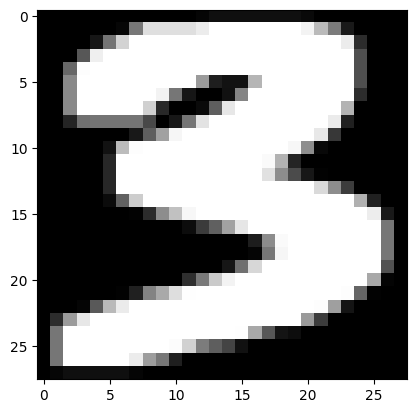

In [ ]:
contours, _ = cv2.findContours(dilation_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

digit_predictions = []
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = dilation_resized[y:y+h, x:x+w]
    roi_padded  = np.pad(roi, pad_width=5, constant_values=0)  # Padding

    # Preprocess the ROI for the model
    roi_prepared = preprocess_digit(roi_padded)


    # Predict the digit
    prediction = model(np.array([roi_prepared]), training=False)
    predicted_digit = np.argmax(prediction, axis=1)[0]
    digit_predictions.append(predicted_digit)

    print(f"Segmented Digit {i+1}:Predicted as {predicted_digit}")
    # Ensure roi_prepared is correctly reshaped for visualization
    plt.imshow(roi_prepared, cmap='gray')
    plt.show()


    # Draw rectangles and text on the image
    cv2.rectangle(dilation_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(dilation_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)


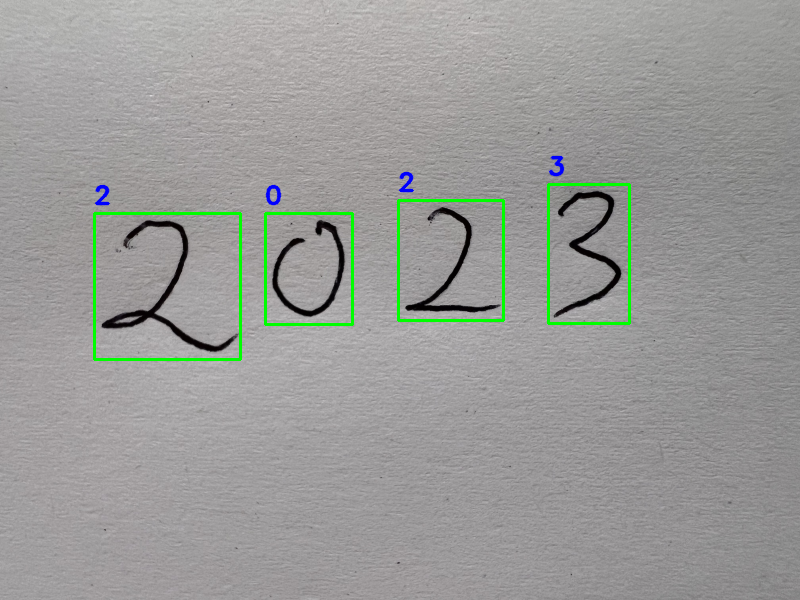

In [ ]:
def print_ctr_original12(image_path, model):
    original_image = cv2.imread(image_path)  # Load the original image
    original_image_resized12 = resize_image(original_image)  # Resize if necessary

    # Assuming 'contours' is available from previous segmentation
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = dilation_resized[y:y+h, x:x+w]  # Using the already processed image for ROI
        roi_padded = np.pad(roi, pad_width=5, constant_values=0)

        roi_prepared = preprocess_digit(roi_padded)
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]

        # Draw rectangles and text on the resized original image
        cv2.rectangle(original_image_resized12, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(original_image_resized12, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return original_image_resized12

# Usage
model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5') # at this case refined_best_model is recognising the second 2 as 7 => best_model.h5
img_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/012.png'
annotated_image = print_ctr_original12(img_path, model)

cv2_imshow(annotated_image)


# 013.png Image Analysis

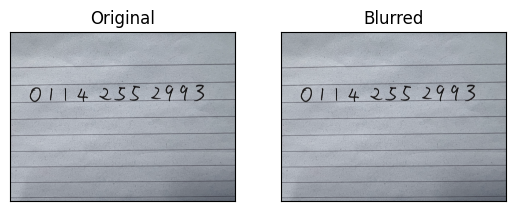

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img13 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/013.png')
assert img13 is not None, "file could not be read, check with os.path.exists()"
blur13 = cv.GaussianBlur(img13,(5,5),0)
plt.subplot(121),plt.imshow(img13),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur13),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

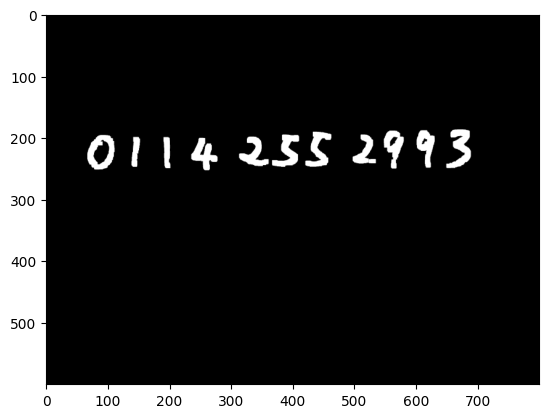

In [ ]:
im13_gray = cv2.cvtColor(blur13, cv2.COLOR_RGB2GRAY)
_, thresh13 = cv2.threshold(im13_gray, 27, 220, cv2.THRESH_BINARY_INV)

erode_kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for erosion
erode_iterations = 0
dilate_kernel = np.ones((3, 3), np.uint8)  # Larger kernel for dilation
dilate_iterations = 15

erode13 = cv2.erode(thresh13, erode_kernel, iterations=erode_iterations)
dilation13 = cv2.dilate(erode13, dilate_kernel, iterations=dilate_iterations)
dilation13_resized=resize_image(dilation13)
plt.imshow(dilation13_resized, cmap='gray')
plt.show()


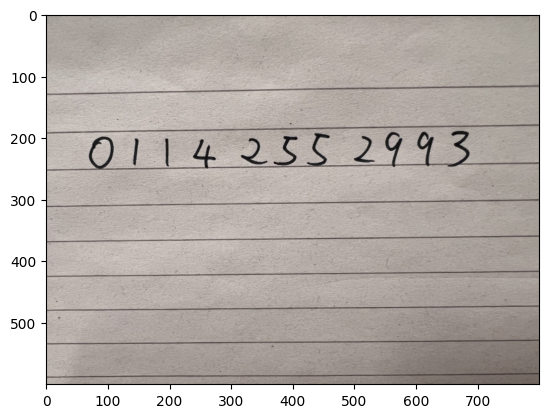

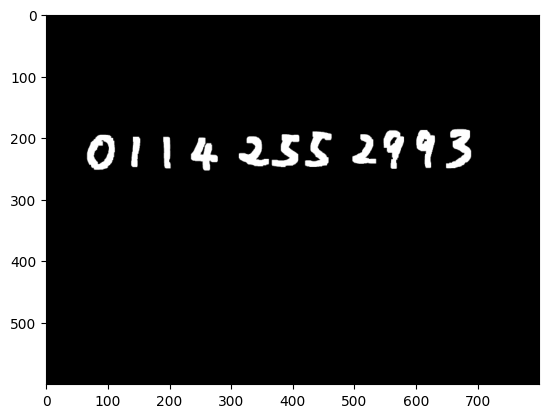

(600, 800, 3)


In [ ]:
import cv2

# Apply resizing
resized_img13 = resize_image(blur13)
plt.imshow(cv2.cvtColor(resized_img13, cv2.COLOR_BGR2RGB))
plt.show()

# Convert to grayscale and apply threshold
im13_gray = cv2.cvtColor(blur13, cv2.COLOR_RGB2GRAY)
_, thresh13 = cv2.threshold(im13_gray, 27, 220, cv2.THRESH_BINARY_INV)

erode_kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for erosion
erode_iterations = 0
dilate_kernel = np.ones((3, 3), np.uint8)  # Larger kernel for dilation
dilate_iterations = 17

erode13 = cv2.erode(thresh13, erode_kernel, iterations=erode_iterations)
dilation13 = cv2.dilate(erode13, dilate_kernel, iterations=dilate_iterations)
dilation13_resized=resize_image(dilation13)

plt.imshow(dilation13_resized, cmap='gray')
plt.show()



print(resized_img13.shape)

Segmented Digit 1:Predicted as 0


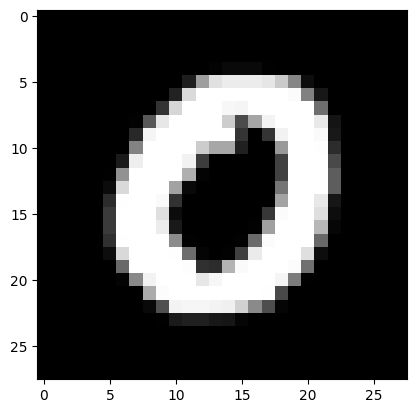

Segmented Digit 2:Predicted as 1


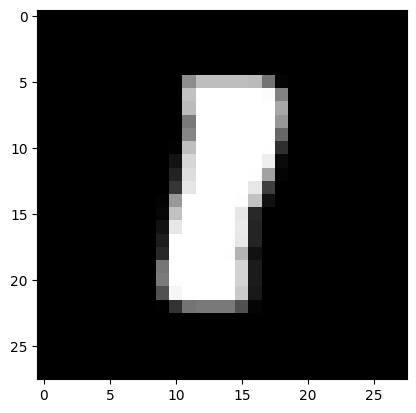

Segmented Digit 3:Predicted as 1


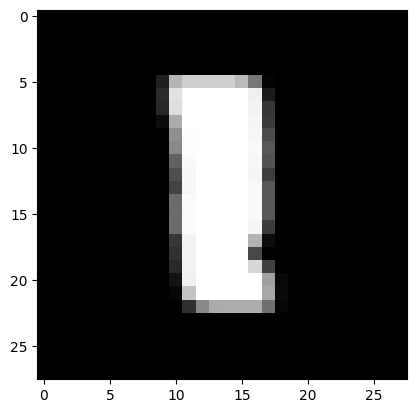

Segmented Digit 4:Predicted as 4


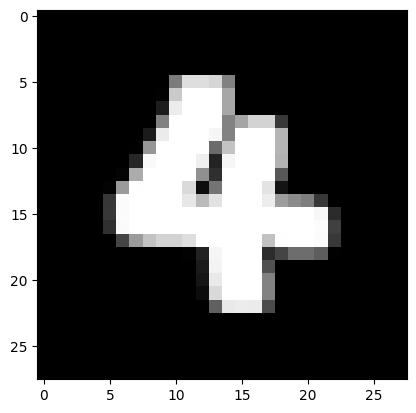

Segmented Digit 5:Predicted as 2


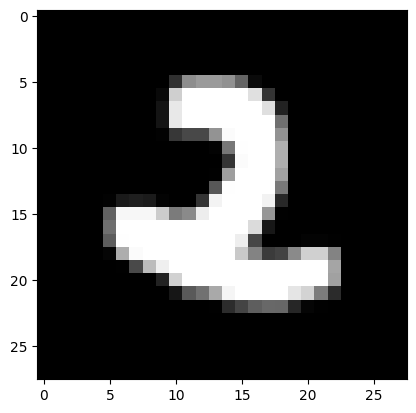

Segmented Digit 6:Predicted as 5


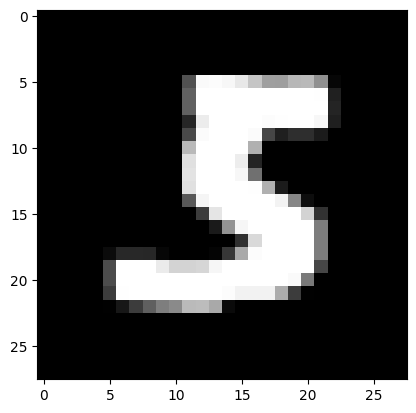

Segmented Digit 7:Predicted as 5


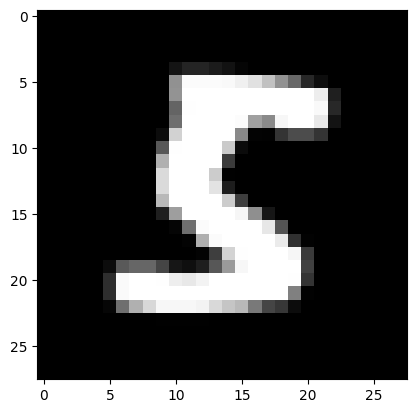

Segmented Digit 8:Predicted as 2


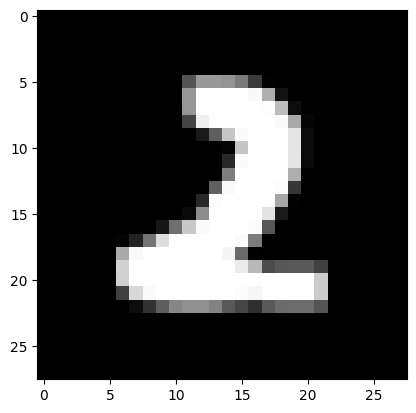

Segmented Digit 9:Predicted as 9


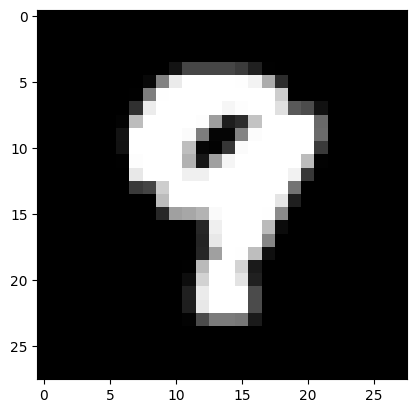

Segmented Digit 10:Predicted as 9


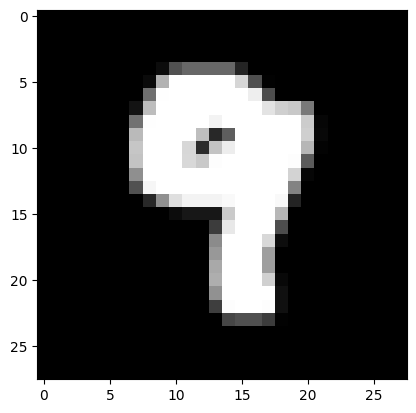

Segmented Digit 11:Predicted as 3


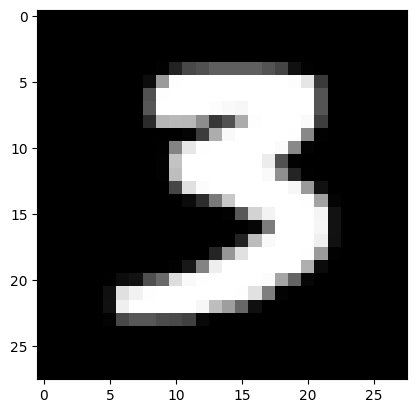

In [ ]:
contours, _ = cv2.findContours(dilation13_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

digit_predictions13 = []
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = dilation13_resized[y:y+h, x:x+w]
    roi_padded  = np.pad(roi, pad_width=15, constant_values=0)  # Padding

    # Preprocess the ROI for the model
    roi_prepared = preprocess_digit(roi_padded)


    # Predict the digit
    prediction = model(np.array([roi_prepared]), training=False)
    predicted_digit = np.argmax(prediction, axis=1)[0]
    digit_predictions13.append(predicted_digit)

    print(f"Segmented Digit {i+1}:Predicted as {predicted_digit}")
    # Ensure roi_prepared is correctly reshaped for visualization
    plt.imshow(roi_prepared, cmap='gray')
    plt.show()


    # Draw rectangles and text on the image
    cv2.rectangle(dilation13_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(dilation13_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)


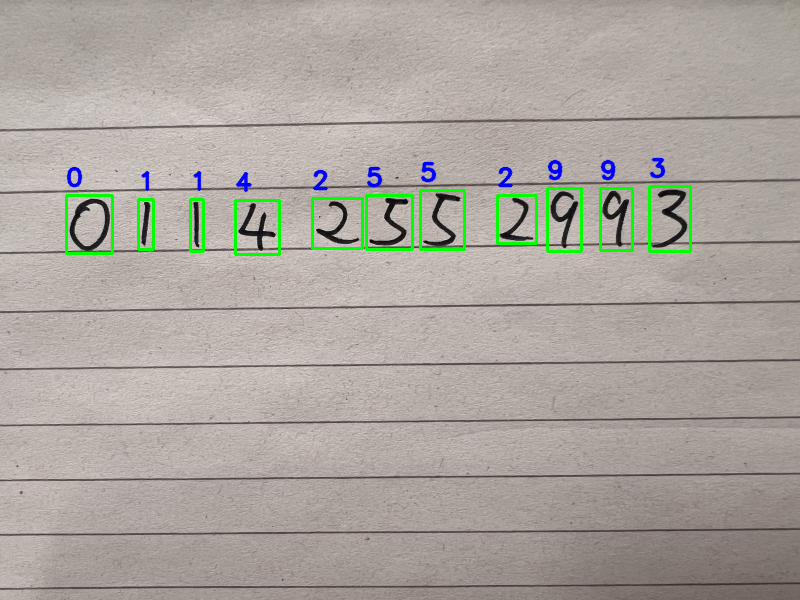

In [ ]:
def print_ctr_original13(image_path, model):
    original_image = cv2.imread(image_path)  # Load the original image
    original_image_resized = resize_image(original_image)  # Resize if necessary

    # Assuming 'contours' is available from previous segmentation
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = dilation13_resized[y:y+h, x:x+w]  # Using the already processed image for ROI
        roi_padded = np.pad(roi, pad_width=10, constant_values=0)

        roi_prepared = preprocess_digit(roi_padded)
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]

        # Draw rectangles and text on the resized original image
        cv2.rectangle(original_image_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(original_image_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return original_image_resized

# Usage
model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5') # at this case refined_best_model is working fine  => refined_best_model.h5

img_path13 = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/013.png'
annotated_image = print_ctr_original13(img_path13, model)



cv2_imshow(annotated_image)


# 014.png Image Analysis

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img14 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/014.png')
assert img14 is not None, "file could not be read, check with os.path.exists()"

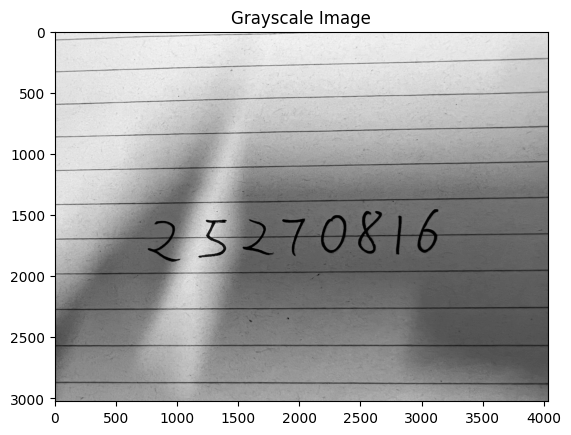

In [ ]:
# Convert to grayscale
im14_gray = cv2.cvtColor(img14, cv2.COLOR_BGR2GRAY)
plt.imshow(im14_gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()


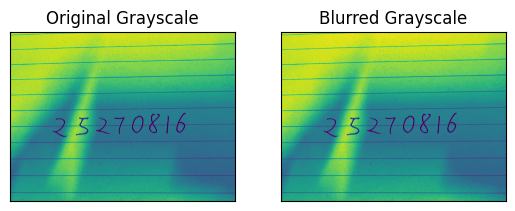

In [ ]:

blur14 = cv.GaussianBlur(im14_gray,(11,11),0)
plt.subplot(121),plt.imshow(im14_gray),plt.title('Original Grayscale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur14),plt.title('Blurred Grayscale')
plt.xticks([]), plt.yticks([])
plt.show()

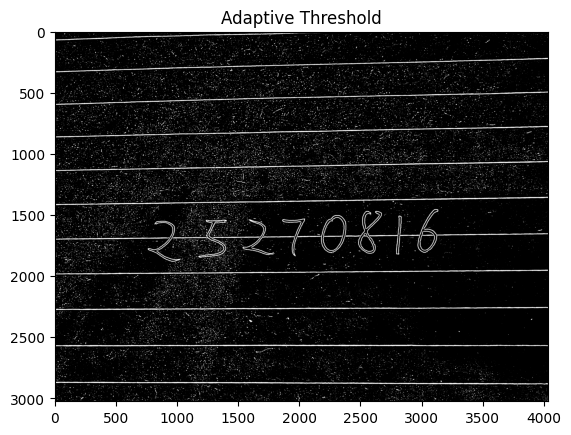

In [ ]:
# Adaptive Thresholding
thresh14 = cv2.adaptiveThreshold(blur14, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh14, cmap='gray')
plt.title('Adaptive Threshold')
plt.show()


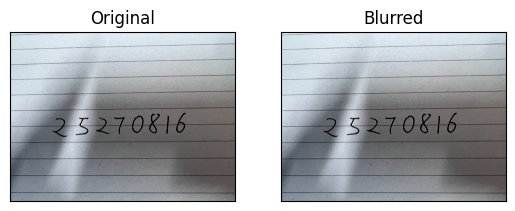

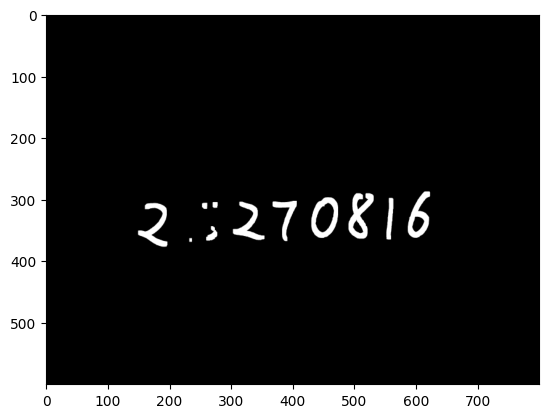

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img14 = cv.imread('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/014.png')
assert img14 is not None, "file could not be read, check with os.path.exists()"
blur14 = cv.GaussianBlur(img14,(7,5),0)
plt.subplot(121),plt.imshow(img14),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur14),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

im14_gray = cv2.cvtColor(blur14, cv2.COLOR_RGB2GRAY)
_, thresh14 = cv2.threshold(im14_gray,8, 220, cv2.THRESH_BINARY_INV)

erode_kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for erosion
erode_iterations = 1
dilate_kernel = np.ones((4, 3), np.uint8)  # Larger kernel for dilation
dilate_iterations = 9

erode14 = cv2.erode(thresh14, erode_kernel, iterations=erode_iterations)
dilation14 = cv2.dilate(erode14, dilate_kernel, iterations=dilate_iterations)
closing = cv.morphologyEx(dilation14, cv.MORPH_CLOSE, kernel)
closing_resized=resize_image(dilation14)
plt.imshow(closing_resized, cmap='gray')
plt.show()

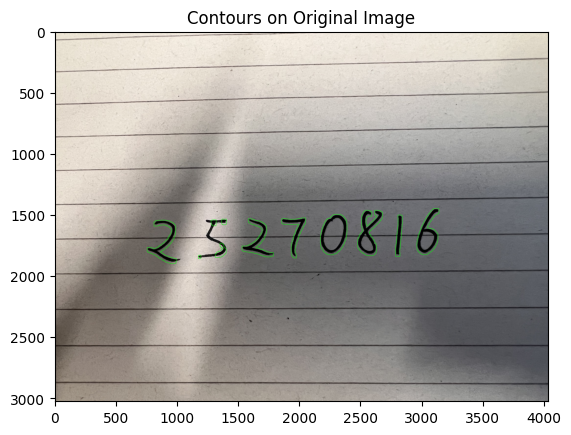

In [ ]:
# Find and draw contours
contours, _ = cv2.findContours(dilation14, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoured_img = cv2.drawContours(img14.copy(), contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))
plt.title('Contours on Original Image')
plt.show()


In [ ]:
print(closing_resized.shape)

(600, 800)


Segmented Digit 1:Predicted as 2


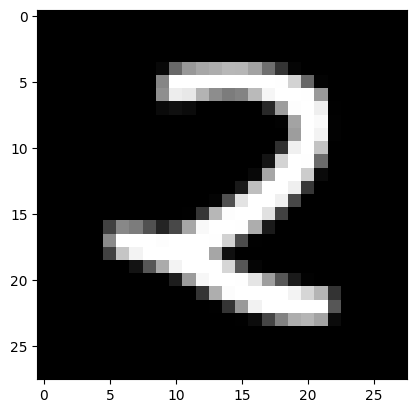

Segmented Digit 2:Predicted as 5


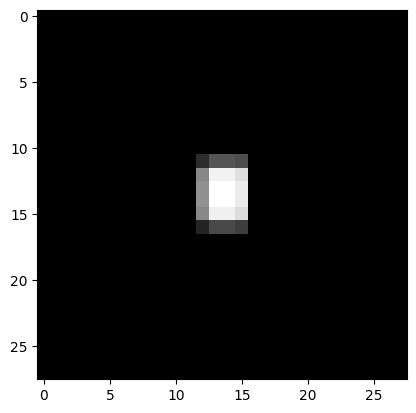

Segmented Digit 3:Predicted as 9


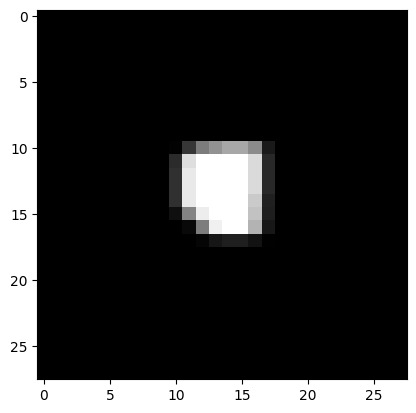

Segmented Digit 4:Predicted as 2


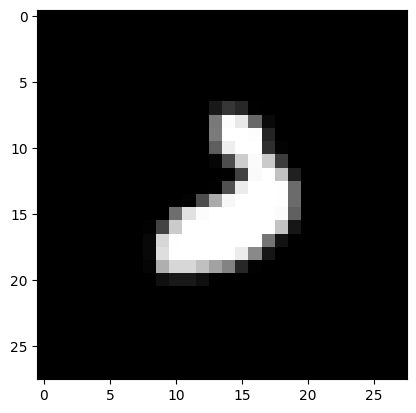

Segmented Digit 5:Predicted as 9


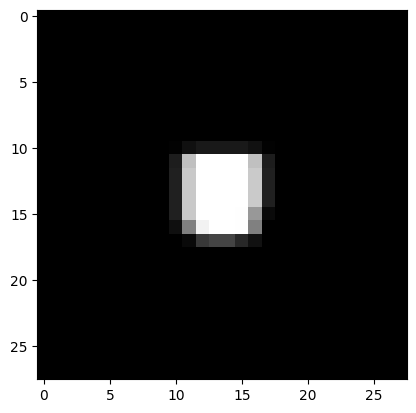

Segmented Digit 6:Predicted as 2


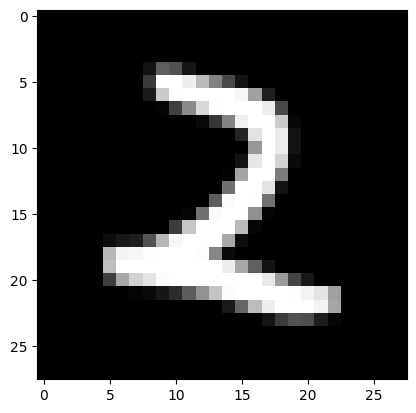

Segmented Digit 7:Predicted as 7


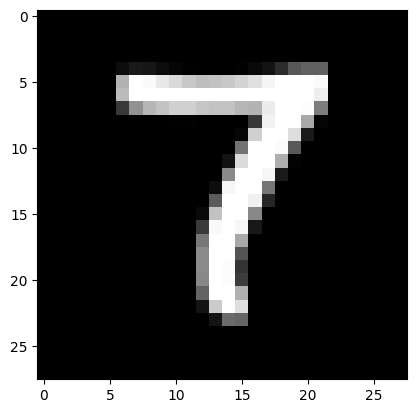

Segmented Digit 8:Predicted as 0


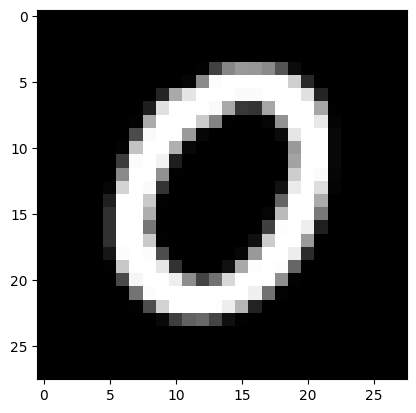

Segmented Digit 9:Predicted as 8


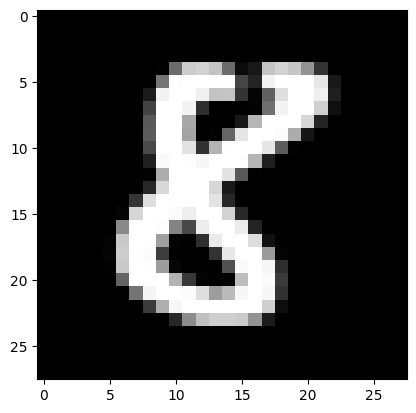

Segmented Digit 10:Predicted as 1


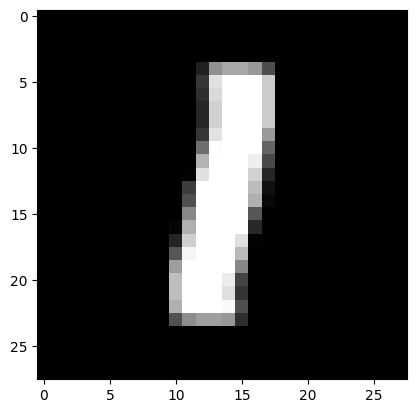

Segmented Digit 11:Predicted as 6


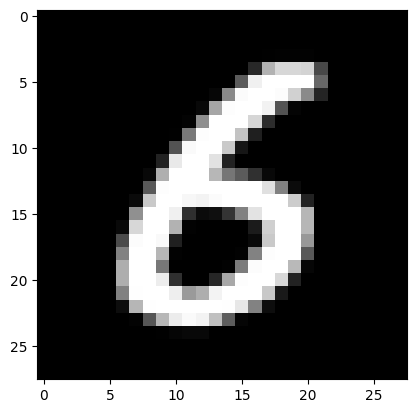

In [ ]:
contours, _ = cv2.findContours(closing_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

digit_predictions14 = []
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = closing_resized[y:y+h, x:x+w]
    roi_padded  = np.pad(roi, pad_width=15, constant_values=0)  # Padding

    # Preprocess the ROI for the model
    roi_prepared = preprocess_digit(roi_padded)


    # Predict the digit
    prediction = model(np.array([roi_prepared]), training=False)
    predicted_digit = np.argmax(prediction, axis=1)[0]
    digit_predictions14.append(predicted_digit)

    print(f"Segmented Digit {i+1}:Predicted as {predicted_digit}")
    # Ensure roi_prepared is correctly reshaped for visualization
    plt.imshow(roi_prepared, cmap='gray')
    plt.show()


    # Draw rectangles and text on the image
    cv2.rectangle(closing_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(closing_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)


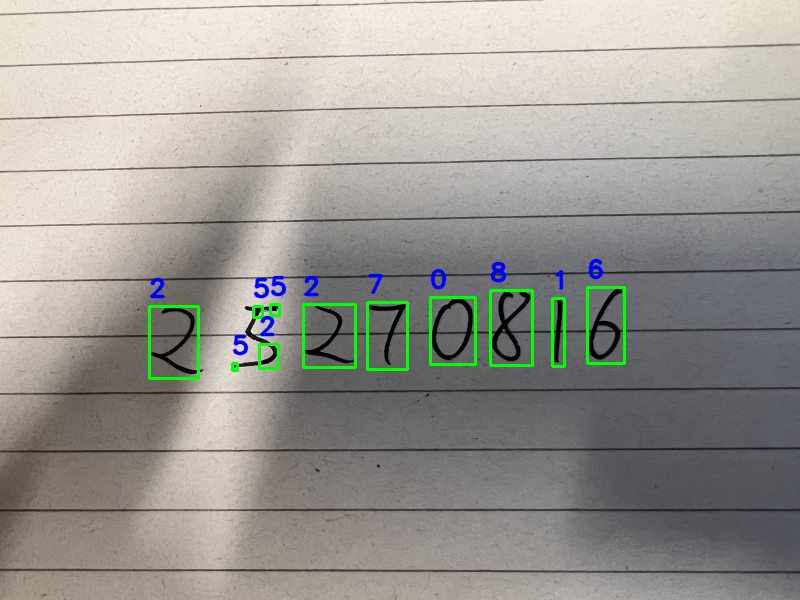

In [ ]:
def print_ctr_original14(image_path, model):
    original_image = cv2.imread(image_path)  # Load the original image
    original_image_resized = resize_image(original_image)  # Resize if necessary

    # Assuming 'contours' is available from previous segmentation
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = closing_resized[y:y+h, x:x+w]  # Using the already processed image for ROI
        roi_padded = np.pad(roi, pad_width=15, constant_values=0)

        roi_prepared = preprocess_digit(roi_padded)
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]

        # Draw rectangles and text on the resized original image
        cv2.rectangle(original_image_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(original_image_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return original_image_resized


model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/best_model.h5') # at this case refined_best_model is not working properly on the prediction  => best_model.h5

img_path14 = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/testdataset1/014.png'

annotated_image = print_ctr_original14(img_path14, model)



cv2_imshow(annotated_image)


# 015.avi Video Processing and Frame analysis
# Manual Check of the last frame

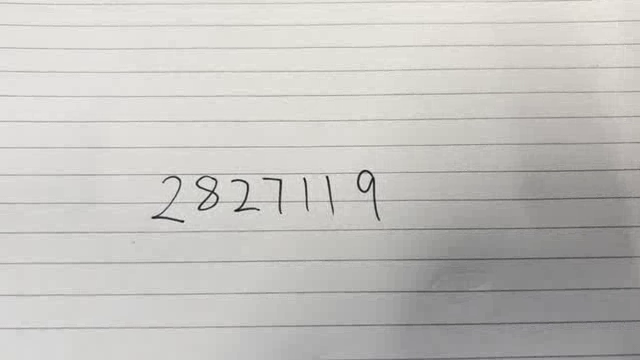

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# video file
video_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/015.avi'
capturer = cv2.VideoCapture(video_path)

last_frame = None
while True:
    ret, frame = capturer.read()
    if not ret:
        break
    last_frame = frame

capturer.release()

# Check if  successfully captured the last frame
if last_frame is not None:
    cv2_imshow(last_frame)  # Display the last frame
else:
    print("Error: No frames found in the video.")


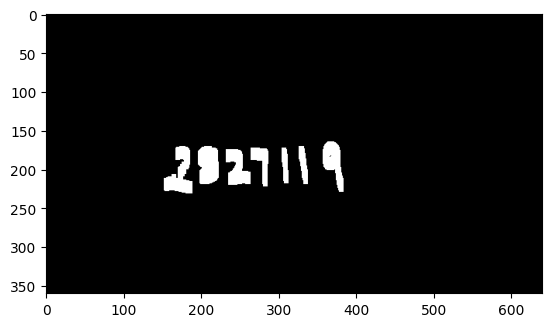

In [ ]:
im15_gray = cv2.cvtColor(last_frame, cv2.COLOR_RGB2GRAY)
_, thresh15 = cv2.threshold(im15_gray, 77, 220, cv2.THRESH_BINARY_INV)
dilate_kernel = np.ones((4,2), np.uint8)  # Larger kernel for dilation
dilate_iterations = 5
dilation15 = cv2.dilate(thresh15, dilate_kernel, iterations=dilate_iterations)

plt.imshow(dilation15, cmap='gray')
plt.show()


In [ ]:
dilation15_resized= resize_image(dilation15)
print(dilation15_resized.shape)

(450, 800)


Segmented Digit 1:Predicted as 2


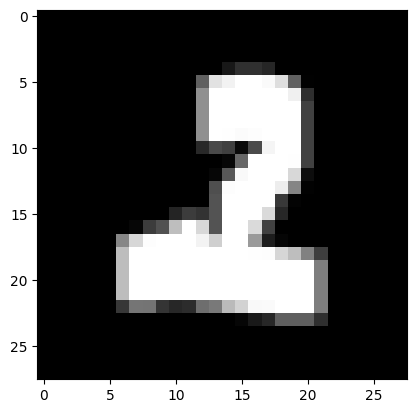

Segmented Digit 2:Predicted as 8


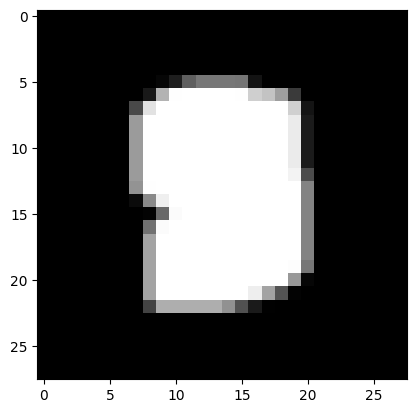

Segmented Digit 3:Predicted as 2


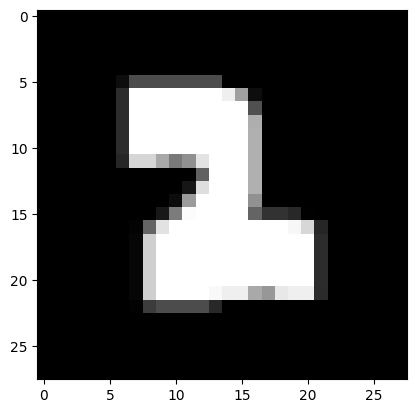

Segmented Digit 4:Predicted as 7


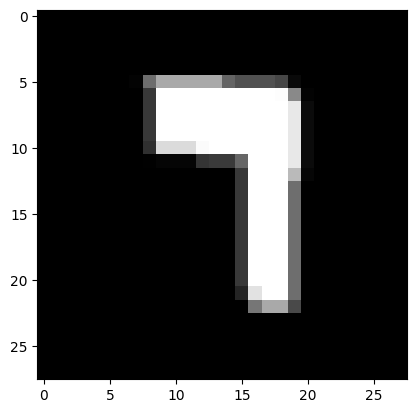

Segmented Digit 5:Predicted as 1


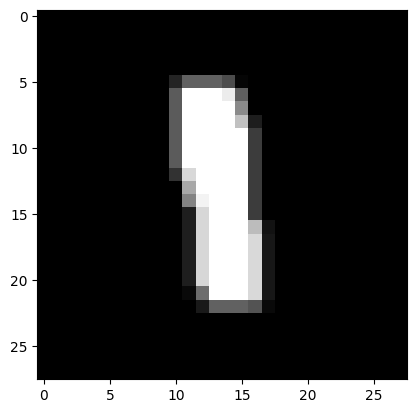

Segmented Digit 6:Predicted as 1


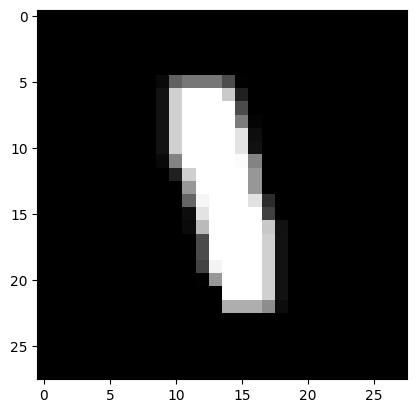

Segmented Digit 7:Predicted as 9


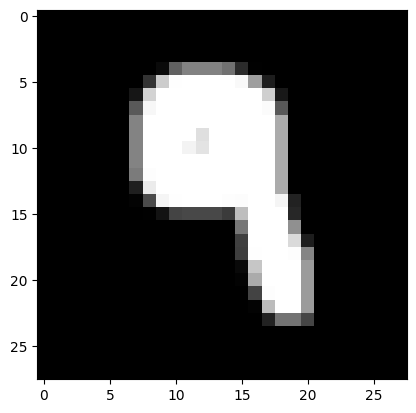

In [ ]:
contours, _ = cv2.findContours(dilation15_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

digit_predictions15 = []
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    roi = dilation15_resized[y:y+h, x:x+w]
    roi_padded  = np.pad(roi, pad_width=19, constant_values=0)  # Padding

    # Preprocess the ROI for the model
    roi_prepared = preprocess_digit(roi_padded)


    # Predict the digit
    prediction = model(np.array([roi_prepared]), training=False)
    predicted_digit = np.argmax(prediction, axis=1)[0]
    digit_predictions15.append(predicted_digit)

    print(f"Segmented Digit {i+1}:Predicted as {predicted_digit}")
    # Ensure roi_prepared is correctly reshaped for visualization
    plt.imshow(roi_prepared, cmap='gray')
    plt.show()


    # Draw rectangles and text on the image
    cv2.rectangle(dilation15_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(dilation15_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)


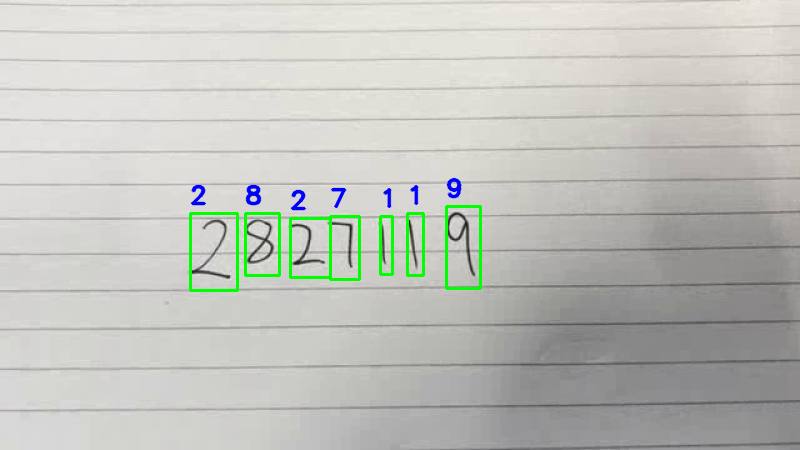

In [ ]:
def print_ctr_original15(image_path, model):

    original_image_resized = resize_image(last_frame)  # Resize if necessary

    # Assuming 'contours' is available from previous segmentation
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = dilation15_resized[y:y+h, x:x+w]  # Using the already processed image for ROI
        roi_padded = np.pad(roi, pad_width=15, constant_values=0)

        roi_prepared = preprocess_digit(roi_padded)
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]

        # Draw rectangles and text on the resized original image
        cv2.rectangle(original_image_resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(original_image_resized, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return original_image_resized


model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5')

annotated_image = print_ctr_original15(last_frame, model)



cv2_imshow(annotated_image)



In [ ]:
print(annotated_image.shape)

(450, 800, 3)


# Process Frame Function

In [ ]:
def process_frame(frame, model):
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply thresholding
    _, thresh_frame = cv2.threshold(gray_frame, 77, 220, cv2.THRESH_BINARY_INV)

    # Apply dilation
    dilate_kernel = np.ones((4, 2), np.uint8)
    dilated_frame = cv2.dilate(thresh_frame, dilate_kernel, iterations=5)

    # Find contours
    contours, _ = cv2.findContours(dilated_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    digit_predictions = []
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        roi = dilated_frame[y:y+h, x:x+w]
        roi_padded = np.pad(roi, pad_width=19, constant_values=0)

        # Preprocess the ROI for the model
        roi_prepared = preprocess_digit(roi_padded)

        # Predict the digit
        prediction = model(np.array([roi_prepared]), training=False)
        predicted_digit = np.argmax(prediction, axis=1)[0]
        digit_predictions.append(predicted_digit)

        # Draw rectangles and text on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    return frame

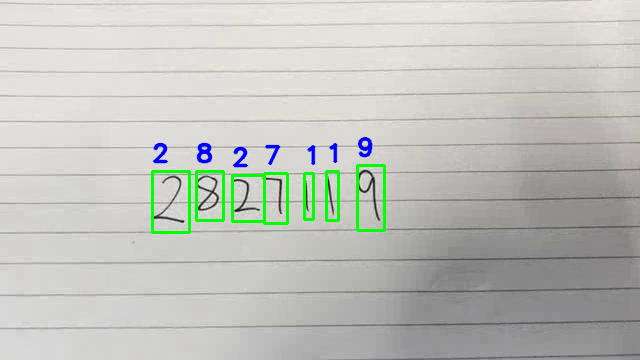

In [ ]:
processed_frame = process_frame(last_frame, model)
cv2_imshow(processed_frame)


# Integration with the Video Processing

In [ ]:
import cv2


model = load_model('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/best_model2.h5')

# Video capture and writer setup
capturer = cv2.VideoCapture('/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/testdataset/015.avi')
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#output_video_path = '/content/drive/MyDrive/ColabNotebooks/Level3MastersDegree/ML-CV/output.mp4'
#frame_rate = 20  # Adjust as needed
#frame_size = (450, 800)  # Adjust to match the size of processed frames
#out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

while capturer.isOpened():
    ret, frame = capturer.read()
    if not ret:
        print("End of video file reached or can't receive frame.")
        break

    # Processing the current frame
    processed_frame = process_frame(frame, model)

    # Writing the frame to the output video
    #out.write(processed_frame)

    # Displaying the processed frame
    cv2_imshow(processed_frame)



# Releasing resources
capturer.release()
#out.release()
cv2.destroyAllWindows()
